In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def train_test_split(features,target):
    if len(features) == len(target):
        train_len = int(len(features)*0.7)
        test_len = int(len(features)*0.3)
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        for i in range(train_len):
            X_train.append(features[i])  #the index value we append in X_train , In Y_train also the index element must be same
            Y_train.append(target[i])
        for i in range(train_len,len(features)):
            X_test.append(features[i])
            Y_test.append(target[i])
        return np.array(X_train),np.array(X_test),np.array(Y_train),np.array(Y_test)
            
    else:
        return "Length is not equal of both features and target....."

In [3]:
class LinearRegression:
    def __init__(self):
        self.features = None
        self.target = None
        self.coeff_ = None
        self.intercept_ = None
    
    def fit(self,feature,target): #always train the model 
        """
            In this fit will train the data and return the values of coeff_ and intercept_
        """
        self.features = feature
        self.target = target
        self.coeff_ = ((self.features - self.features.mean()) * (self.target - self.target.mean())).sum() / ((self.features - self.features.mean())**2).sum()
        self.intercept_ = abs(target.mean() - (self.coeff_ * feature.mean()))
        
    def mae(self,actual,predict):
        mae = (abs(actual - predict)).sum() / len(actual)
        return mae
    
    def mse(self,actual,predict):
        mse = ((actual - predict)**2).sum() / len(actual)
        return mse
    
    def predict(self,test):
        self.pred = self.intercept_ + (self.coeff_ * test)
        return self.pred
    
    def r2_score(self,actual,predict):
        mse = self.mse(actual,predict)
        r2 = 1 - (mse/((actual - predict)**2).sum())
        return r2
    

In [52]:
iris = sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


    Possible Features --> sepal_length, petal_length, sepal_width, petal_width
    Target --> Species

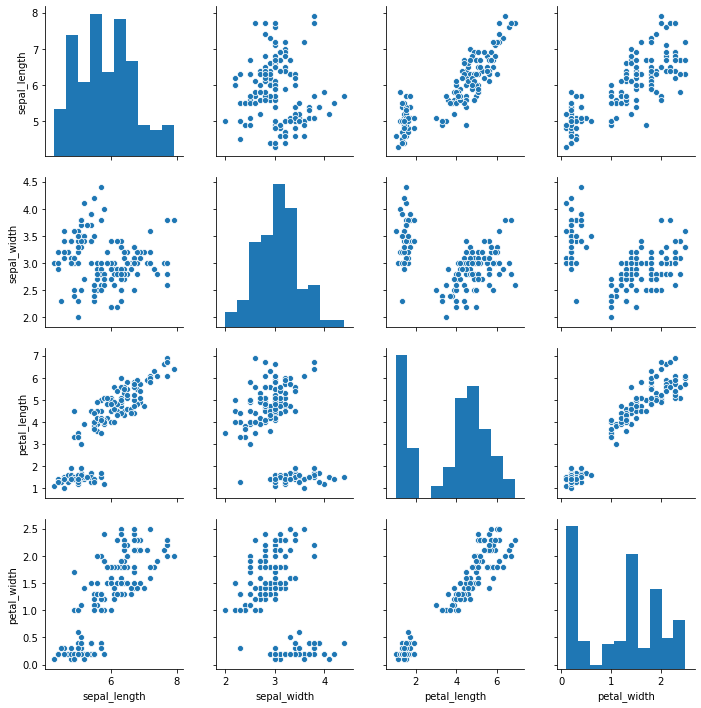

In [6]:
sns.pairplot(iris)

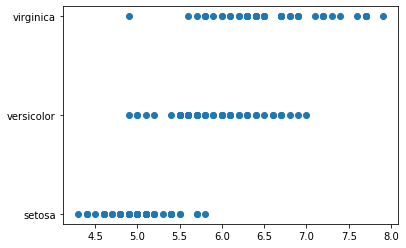

In [8]:
plt.plot(iris['sepal_length'],iris['species'],'o')

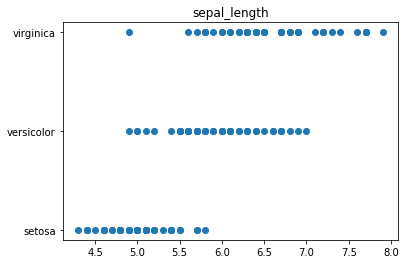

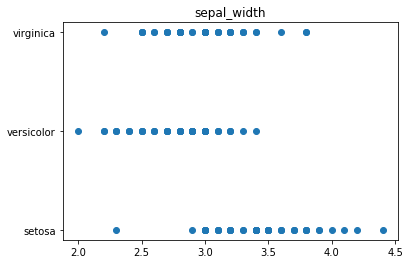

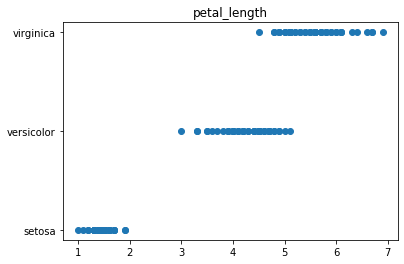

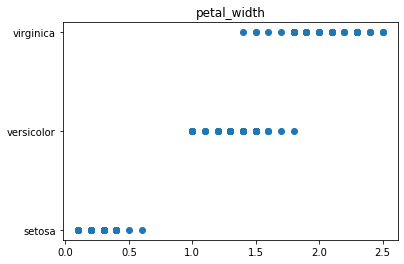

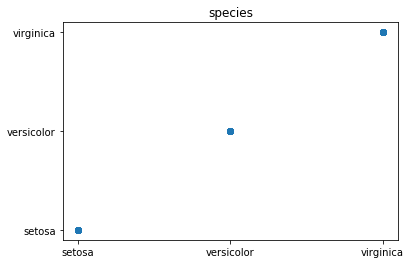

In [12]:
for i in iris.columns:
    plt.plot(iris[i],iris['species'],'o')
    plt.title(i)
    plt.show()

In [24]:
feature = iris['petal_width']
target = iris['species']

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target)

In [26]:
model = LinearRegression()

In [17]:
X_train[:5]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [18]:
Y_train[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [16]:
model.fit(X_train,Y_train)

TypeError: cannot perform reduce with flexible type

In [27]:
Y_train = pd.Series(Y_train).map({"setosa":0,"virginica":1,"versicolor":2})

In [28]:
Y_train[:5]

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [29]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [30]:
Y_train.tail()

100    1
101    1
102    1
103    1
104    1
dtype: int64

In [31]:
model.fit(X_train,Y_train)

In [32]:
model.coeff_

1.3452148785036089

In [33]:
model.intercept_

0.14151091118734827

In [34]:
pred = model.predict(X_test)

In [35]:
pred[:5]

array([2.96646216, 2.4283762 , 2.56289769, 2.56289769, 3.50454811])

In [38]:
Y_test = pd.Series(Y_test).map({"setosa":0,"virginica":1,"versicolor":2})

In [39]:
model.mse(Y_test,pred)

3.57954937898116

In [40]:
model.r2_score(Y_test,pred)

0.9777777777777777

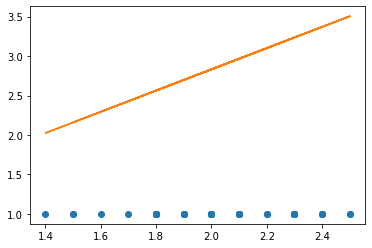

In [42]:
plt.plot(X_test,Y_test,'o')
plt.plot(X_test,pred)
plt.show()

In [43]:
Y_test

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
dtype: int64

In [45]:
Y_test

array(['virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U9')

In [47]:
from sklearn.datasets import load_iris

In [67]:
df = load_iris()

In [54]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [55]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
target = pd.Series(target).map({"setosa":0,"virginica":1,'versicolor':2})

In [60]:
np.corrcoef(iris['petal_width'],target)

array([[1.        , 0.58037703],
       [0.58037703, 1.        ]])

In [ ]:
from sklearn.datasets import l

In [61]:
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
df1 = pd.DataFrame(df.data,columns=df.feature_names)

In [69]:
feature = df1['petal width (cm)']

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,df.target)

In [71]:
X_train[:5]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [72]:
Y_train[:5]

array([0, 0, 0, 0, 0])

In [73]:
Y_test[:5]

array([2, 2, 2, 2, 2])

In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train,Y_train)

In [76]:
model.coeff_

0.9064185967060031

In [77]:
model.intercept_

0.19773235206195128

In [78]:
p = model.predict(X_test)

In [79]:
model.r2_score(Y_test,p)

0.9777777777777777

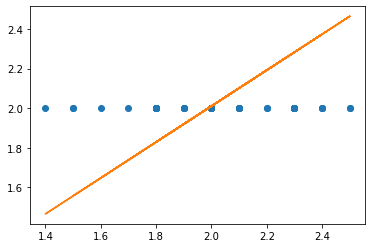

In [80]:
plt.plot(X_test,Y_test,'o')
plt.plot(X_test,p)
plt.show()

#### Multiple Linear Regression


    Use multiple Features to find a particular value
    
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 +..... + \beta_n x_n $$


    where x denotes the feature

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [82]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(df1,target)

In [84]:
X_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
106,4.9,2.5,4.5,1.7
98,5.1,2.5,3.0,1.1
31,5.4,3.4,1.5,0.4
47,4.6,3.2,1.4,0.2
72,6.3,2.5,4.9,1.5


In [85]:
X_test[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
13,4.3,3.0,1.1,0.1
61,5.9,3.0,4.2,1.5
53,5.5,2.3,4.0,1.3
119,6.0,2.2,5.0,1.5
124,6.7,3.3,5.7,2.1


In [86]:
Y_train[:5]

106    1
98     2
31     0
47     0
72     2
Name: species, dtype: int64

In [88]:
Y_test[:5]

13     0
61     2
53     2
119    1
124    1
Name: species, dtype: int64

In [89]:
model = LinearRegression()

In [90]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
model.coef_
#the coeff are 4 bcz the features which  we used here were 4

array([-0.20631745, -0.63238583,  0.56068705, -0.52850966])

In [92]:
model.intercept_

2.697411848632961

In [93]:
pred = model.predict(X_test)

In [94]:
pred

array([ 0.4769941 ,  1.14510251,  1.6638641 ,  2.07892907,  1.31425758,
        0.11110237,  1.69367104,  0.46855878, -0.46165017,  1.10285372,
        1.64866449,  1.19715349,  1.26802741,  1.08367273,  1.64866449,
        1.75732206,  1.53309478,  1.31109423,  1.35358681,  1.23053074,
       -0.02120132, -0.14124301,  1.54904547,  1.53358376,  0.51423987,
        1.66921261,  2.03478785,  0.14653933,  0.14197825,  1.35591546,
        0.25821128,  1.82290597,  1.47515717,  1.68685373,  1.81600503,
        1.54845456,  1.59165231,  1.13519839])

In [95]:
Y_test

13     0
61     2
53     2
119    1
124    1
0      0
133    1
1      0
14     0
144    1
142    1
86     2
52     2
51     2
101    1
68     2
93     2
79     2
100    1
120    1
10     0
5      0
137    1
102    1
9      0
73     2
108    1
27     0
37     0
78     2
49     0
105    1
76     2
113    1
130    1
104    1
116    1
110    1
Name: species, dtype: int64

In [96]:
r2_score(Y_test,pred)

0.40897736604311696

In [97]:
mean_absolute_error(Y_test,pred)

0.5018880770209025

In [98]:
mean_squared_error(Y_test,pred)

0.326208475944346

In [99]:
round(0.4769941)

0

In [100]:
round(1.14510251)

1

In [101]:
round(-0.14124301)

0

In [102]:
pred = pd.Series(pred).apply(lambda x : round(x))

In [103]:
pred

0     0
1     1
2     2
3     2
4     1
5     0
6     2
7     0
8     0
9     1
10    2
11    1
12    1
13    1
14    2
15    2
16    2
17    1
18    1
19    1
20    0
21    0
22    2
23    2
24    1
25    2
26    2
27    0
28    0
29    1
30    0
31    2
32    1
33    2
34    2
35    2
36    2
37    1
dtype: int64

In [104]:
r2_score(Y_test,pred)

0.04642409033877015

In [105]:
mean_absolute_error(Y_test,pred)

0.5263157894736842

In [106]:
Y_test

13     0
61     2
53     2
119    1
124    1
0      0
133    1
1      0
14     0
144    1
142    1
86     2
52     2
51     2
101    1
68     2
93     2
79     2
100    1
120    1
10     0
5      0
137    1
102    1
9      0
73     2
108    1
27     0
37     0
78     2
49     0
105    1
76     2
113    1
130    1
104    1
116    1
110    1
Name: species, dtype: int64

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(Y_test,pred)

0.47368421052631576

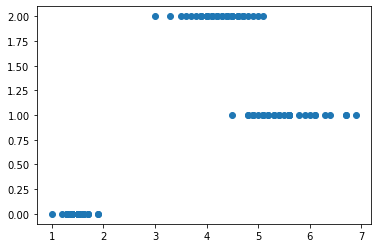

In [109]:
plt.plot(X_train['petal length (cm)'],Y_train,'o')
plt.show()

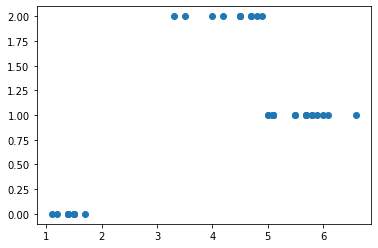

In [110]:
plt.plot(X_test['petal length (cm)'],Y_test,'o')
plt.show()

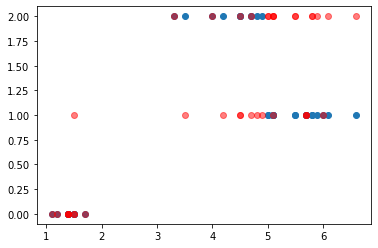

In [111]:
plt.plot(X_test['petal length (cm)'],Y_test,'o')
plt.plot(X_test['petal length (cm)'],pred,'ro',alpha=0.5)
plt.show()

In [112]:
plt.rcParams['figure.figsize'] = 11,5

In [115]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [116]:
plt.style.use("seaborn-darkgrid")

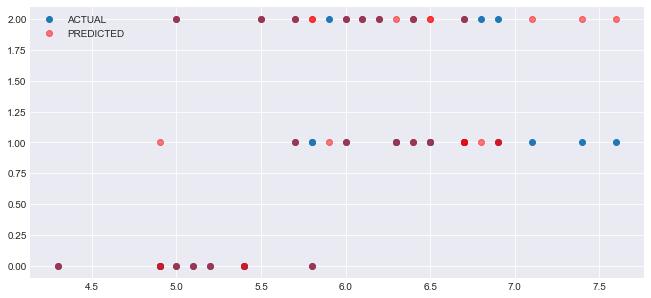

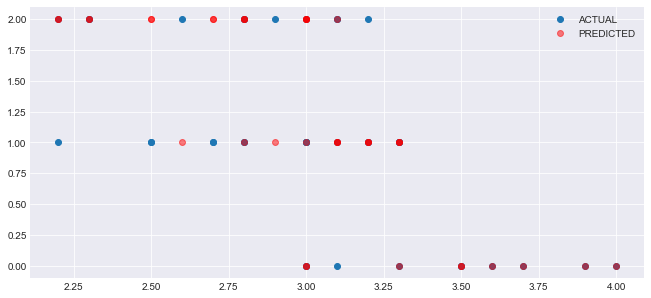

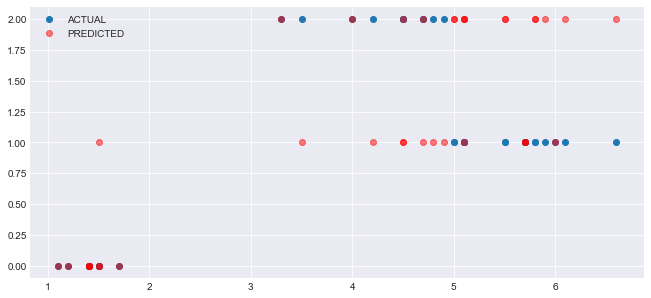

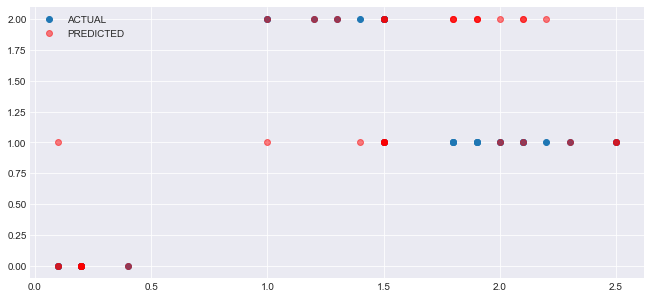

In [117]:
for i in df1.columns:
    plt.plot(X_test[i],Y_test,'o',label="ACTUAL")
    plt.plot(X_test[i],pred,'ro',alpha=0.5,label="PREDICTED")
    plt.legend()
    plt.show()

In [118]:
from sklearn.datasets import load_boston

In [120]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [121]:
boston = load_boston()

In [123]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [124]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [125]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [126]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [127]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [129]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [130]:
df['price'] = boston.target

In [131]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [132]:
# 1. Collection of Data (done)
# 2. Preprocessing
# 3. EDA (analysis you are selecting your features)
# 4. Splitting
# 5. Model Selection
# 6. Model Evaluation (try to plot it and read it also)
